# The impact of tuition fees increase in England on EU undergraduate student mobility

Dias Lopes, Alice
<br>
Gonzalez, Jose Luis Mateos 
<br>
Wakeling, Paul

Abstract

*This paper aims to understand the impact of tuition fee increases in England on EU international undergraduate student mobility. First, we compared changes in EU undergraduate enrolments in England, which trebled its tuition fee levels in 2012/13 from £3,375 to £9,000, with those observed in Scotland, which does not charge tuition fees to EU undergraduate students. Second, we look at the changes in enrolment by field of study and type of higher education institution by EU countries. Our analysis shows that, on average, English universities suffered a sudden drop in EU enrolments in 2012/13 but recovered their pre-2012 enrolment levels in subsequent academic years. We observe that those English universities regarded as less prestigious experienced the sharpest decline and took longer to recover their pre-2012 numbers. Still, we found different student mobility patterns when examining differences between EU countries. While there is a significant decrease in the number of students from some Western European countries (mainly German and French students) attending English universities after 2012, the tuition fees increase did not impact the number of students coming from Southern Europe. Moreover, we found country-specific patterns regarding the field of studies: a high number of students pursuing subjects allied to Medicine from Ireland, Creative Arts and Design from Portugal, Social Studies from Italy, and Computer Sciences from Romania. Our preliminary results support research on EU intra-mobility that indicates that mobility can be an alternative route of capital accumulation for students from more marginal countries.*

## 1. Introduction

## 2. Literature Review

## 3. Data

## Data Management

In [ ]:
# ---
# author: Alice Dias Lopes
# last updated: 28/02/2022
# ---

eu_data <- read.csv("eu_individual_firstdegree_2021.csv") # dataset retrieved from HEIDI plus
hei_info <- read.csv("hei_info.csv") # created using Pep's data (eu_individual_firstdegree.csv)

#### Sex
eu_data$sex <- eu_data$Sex
eu_data$sex <- as.factor(eu_data$sex)


#### Academic Year
# transforming to a numeric variable
eu_data$acyear <- eu_data$`Academic Year`
eu_data$year <-substr(eu_data$acyear, 1, 4)
eu_data$year <- as.numeric(eu_data$year)


#### EU Countries
# In the HESA dataset, EU countries’ autonomous regions are displayed separately. 
# We have merged these autonomous regions with their countries:
table(eu_data$eu_country)

# Åland Islands with Finland
eu_data$eu_country [eu_data$eu_country == "Åland Islands"] <- "Finland"
# Canary Islands with Spain
eu_data$eu_country [eu_data$eu_country == "Canary Islands"] <- "Spain"
# French Guiana with France
eu_data$eu_country [eu_data$eu_country == "French Guiana"] <- "France"
#	Guadeloupe with France
eu_data$eu_country [eu_data$eu_country == "Guadeloupe"] <- "France"
# Martinique with France
eu_data$eu_country [eu_data$eu_country == "Martinique"] <- "France"
# Mayotte with France
eu_data$eu_country [eu_data$eu_country == "Mayotte"] <- "France"
# Réunion with France
eu_data$eu_country [eu_data$eu_country == "Réunion"] <- "France"
# Cyprus
# Despite joining the EU as a de facto divided island, the whole of Cyprus is EU 
# territory. Turkish Cypriots who have, or are eligible for, EU travel documents 
# are EU citizens. 
# Source: https://european-union.europa.eu/principles-countries-history/country-profiles/cyprus_en
eu_data$eu_country [eu_data$eu_country == "Cyprus (European Union)"] <- "Cyprus"
eu_data$eu_country [eu_data$eu_country == "Cyprus not otherwise specified"] <- "Cyprus"

# renaming European Union not otherwise specified
eu_data$eu_country [eu_data$eu_country == "European Union not otherwise specified"] <- "EU not specified"

#### Provider Country
eu_data$uk_country <- eu_data$`Provider country`
eu_data$uk_country <- as.factor(eu_data$uk_country)

#### Higher Education Institutions
eu_data$hei <- eu_data$`Provider name`

# Dartington College of Art (N=12) merged with Falmouth University in 2008/09.
eu_data$hei [eu_data$hei == "Dartington College of Arts"] <- "Falmouth University"

#	Edinburgh College of Art (N=178) merged with the University of Edinburgh in 2011/12.
eu_data$hei [eu_data$hei == "Edinburgh College of Art"] <- "University of Edinburgh"

#	Institute of Education (N=2) merged with UCL in 2015/16.
eu_data$hei [eu_data$hei == "Institute of Education"] <- "University College London"

#	The School of Pharmacy (N=19) merged with UCL in 2012/13.
eu_data$hei [eu_data$hei == "The School of Pharmacy"] <- "University College London"

#	Leeds College of Music (N=19) merged with Leeds Conservatoire
eu_data$hei [eu_data$hei == "Leeds College of Music"] <- "Leeds Conservatoire"

# I don't understand "University of London (Institutes and activities)"

#### Subject of study
# Combining JACS subject area (2007/08 to 2018/19) with CAH Level 1 (2019/20 - 2020/21)
# JACS subject area
eu_data$jacs_area <- eu_data$`JACS subject area`
eu_data$subject [eu_data$jacs_area == "(1) Medicine & dentistry"] <- 1 
eu_data$subject [eu_data$jacs_area == "(2) Subjects allied to medicine"] <- 2 
eu_data$subject [eu_data$jacs_area == "(3) Biological sciences"] <- 3 
eu_data$subject [eu_data$jacs_area == "(4) Veterinary science"] <- 4
eu_data$subject [eu_data$jacs_area == "(5) Agriculture & related subjects"] <- 5 
eu_data$subject [eu_data$jacs_area == "(6) Physical sciences"] <- 6
eu_data$subject [eu_data$jacs_area == "(7) Mathematical sciences"] <- 7
eu_data$subject [eu_data$jacs_area == "(8) Computer science"] <- 8
eu_data$subject [eu_data$jacs_area == "(9) Engineering & technology"] <- 9
eu_data$subject [eu_data$jacs_area == "(A) Architecture, building & planning"] <- 10
eu_data$subject [eu_data$jacs_area == "(B) Social studies"] <- 11
eu_data$subject [eu_data$jacs_area == "(C) Law"] <- 12
eu_data$subject [eu_data$jacs_area == "(D) Business & administrative studies"] <- 13
eu_data$subject [eu_data$jacs_area == "(E) Mass communications & documentation"] <- 14
eu_data$subject [eu_data$jacs_area == "(F) Languages"] <- 15
eu_data$subject [eu_data$jacs_area == "(G) Historical & philosophical studies"] <- 16
eu_data$subject [eu_data$jacs_area == "(H) Creative arts & design"] <- 17
eu_data$subject [eu_data$jacs_area == "(I) Education"] <- 18
eu_data$subject [eu_data$jacs_area == "(J) Combined"] <- 19

# CAH level 1
eu_data$cah_level <- eu_data$`CAH level 1`
eu_data$subject [eu_data$cah_level == "(01) Medicine and dentistry"] <- 1 
eu_data$subject [eu_data$cah_level == "(02) Subjects allied to medicine"] <- 2 
eu_data$subject [eu_data$cah_level == "(03) Biological and sport sciences"] <- 3
eu_data$subject [eu_data$cah_level == "(04) Psychology"] <- 3
eu_data$subject [eu_data$cah_level == "(05) Veterinary sciences"] <- 4
eu_data$subject [eu_data$cah_level == "(06) Agriculture, food and related studies"] <- 5
eu_data$subject [eu_data$cah_level == "(07) Physical sciences"] <- 6
eu_data$subject [eu_data$cah_level == "(09) Mathematical sciences"] <- 7 
eu_data$subject [eu_data$cah_level == "(10) Engineering and technology"] <- 9
eu_data$subject [eu_data$cah_level == "(11) Computing"] <- 8
eu_data$subject [eu_data$cah_level == "(13) Architecture, building and planning"] <- 10
eu_data$subject [eu_data$cah_level == "(15) Social sciences"] <- 11
eu_data$subject [eu_data$cah_level == "(16) Law"] <- 12
eu_data$subject [eu_data$cah_level == "(17) Business and management"] <- 13
eu_data$subject [eu_data$cah_level == "(19) Language and area studies"] <- 15
eu_data$subject [eu_data$cah_level == "(20) Historical, philosophical and religious studies"] <- 16
eu_data$subject [eu_data$cah_level == "(22) Education and teaching"] <- 18
eu_data$subject [eu_data$cah_level == "(23) Combined and general studies"] <- 19
eu_data$subject [eu_data$cah_level == "(24) Media, journalism and communications"] <- 14
eu_data$subject [eu_data$cah_level == "(25) Design, and creative and performing arts"] <- 17
eu_data$subject [eu_data$cah_level == "(26) Geography, earth and environmental studies (natural sciences)"] <- 6
eu_data$subject [eu_data$cah_level == "(26) Geography, earth and environmental studies (social sciences)"] <- 11

# labels for the variable "subject"
eu_data$subject <- factor(eu_data$subject,
                          levels = c(1:19),
                          labels = c(
                            "Medicine and dentistry",
                            "Subjects allied to medicine",
                            "Biological and sport sciences (incl. psychology)",
                            "Veterinary sciences",
                            "Agriculture, food and related studies", 
                            "Physical science (incl. geography natural sciences)",
                            "Mathematical sciences",
                            "Computer sciences or computing",
                            "Engineering and technology",
                            "Architecture, building and planning",
                            "Social sciences (incl. geography social sciences)",
                            "Law",
                            "Business and management",
                            "Media, journalism and communications",
                            "Language and area studies",
                            "Historical, philosophical and religious studies",
                            "Design, and creative and performing arts",
                            "Education and teaching",
                            "Combined and general studies")
                          )

#### Field of study (might need to change)
eu_data$field <- NA
eu_data$field [eu_data$subject == "Medicine and dentistry"] <- 1 
eu_data$field [eu_data$subject == "Subjects allied to medicine"] <- 1 
eu_data$field [eu_data$subject == "Biological and sport sciences (incl. psychology)"] <- 2
eu_data$field [eu_data$subject == "Veterinary sciences"] <- 1
eu_data$field [eu_data$subject == "Agriculture, food and related studies"] <- 1
eu_data$field [eu_data$subject == "Physical science (incl. geography natural sciences)"] <- 2
eu_data$field [eu_data$subject == "Mathematical sciences"] <- 2
eu_data$field [eu_data$subject == "Computer sciences or computing"] <- 2
eu_data$field [eu_data$subject == "Engineering and technology"] <- 2
eu_data$field [eu_data$subject == "Architecture, building and planning"] <- 3
eu_data$field [eu_data$subject == "Social sciences (incl. geography social sciences)"] <- 3
eu_data$field [eu_data$subject == "Law"] <- 3
eu_data$field [eu_data$subject == "Business and management"] <- 4
eu_data$field [eu_data$subject == "Media, journalism and communications"] <- 3
eu_data$field [eu_data$subject == "Language and area studies"] <- 3
eu_data$field [eu_data$subject == "Historical, philosophical and religious studies"] <- 3
eu_data$field [eu_data$subject == "Design, and creative and performing arts"] <- 3
eu_data$field [eu_data$subject == "Education and teaching"] <- 3
eu_data$field [eu_data$subject == "Combined and general studies"] <- NA

eu_data$field <- factor(eu_data$field,
                      levels = c(1,2,3,4),
                      labels = c("Medicine & Veterinary Medicine", "Science & Engineering", "Arts, Humanities & Social Sciences", 
                                 "Bussiness & Administrative Studies"))

# merging the data on EU enrollment with HEI information
eu_data_final <- left_join(eu_data, hei_info, by = "hei") %>% 
  select(eu_country, fpe, hei, acyear, year, uk_country, sex, jacs_area, 
         cah_level, subject, field, hei_type, provider_region)


# HEI that were not in the hei_info dataset
eu_data_final$hei <- as.factor(eu_data_final$hei)

eu_data_final %>% 
  filter(is.na(hei_type)) %>% 
  summarise(hei = unique(hei))

# Abertay University
eu_data_final$hei_type[eu_data_final$hei == "Abertay University"] <- "Post-1992"
eu_data_final$provider_region[eu_data_final$hei == "Abertay University"] <- "Scotland"  
  
# The University of St. Andrews
eu_data_final$hei_type[eu_data_final$hei == "The University of St. Andrews"] <- "Pre-1992"
eu_data_final$provider_region[eu_data_final$hei == "The University of St. Andrews"] <- "Scotland"  

# Robert Gordon University
eu_data_final$hei_type[eu_data_final$hei == "Robert Gordon University"] <- "Post-1992"
eu_data_final$provider_region[eu_data_final$hei == "Robert Gordon University"] <- "Scotland"  

# University of Edinburgh 
eu_data_final$hei_type[eu_data_final$hei == "University of Edinburgh"] <- "Other RG"
eu_data_final$provider_region[eu_data_final$hei == "University of Edinburgh"] <- "Scotland"

# Leeds Conservatoire
eu_data_final$hei_type[eu_data_final$hei == "Leeds Conservatoire"] <- "Pre-1992"
eu_data_final$provider_region[eu_data_final$hei == "Leeds Conservatoire"] <- "Yorkshire and The Humber"

# AECC University College  
eu_data_final$hei_type[eu_data_final$hei == "AECC University College"] <- "Post-1992"
eu_data_final$provider_region[eu_data_final$hei == "AECC University College"] <- "South West"

# LAMDA Limited  
eu_data_final$hei_type[eu_data_final$hei == "LAMDA Limited"] <- "Pre-1992"
eu_data_final$provider_region[eu_data_final$hei == "LAMDA Limited"] <- "London"

# Hartpury University 
eu_data_final$hei_type[eu_data_final$hei == "Hartpury University"] <- "Post-1992"
eu_data_final$provider_region[eu_data_final$hei == "Hartpury University"] <- "South West"

# Royal Academy of Dramatic Art 
eu_data_final$hei_type[eu_data_final$hei == "Royal Academy of Dramatic Art"] <- "Pre-1992"
eu_data_final$provider_region[eu_data_final$hei == "Royal Academy of Dramatic Art"] <- "London"

# University of London (Institutes and activities)
eu_data_final$hei_type[eu_data_final$hei == "University of London (Institutes and activities)"] <- "Pre-1992"
eu_data_final$provider_region[eu_data_final$hei == "University of London (Institutes and activities)"] <- "London"

eu_data$hei_type2 <- NA
eu_data_final$hei_type2[eu_data_final$hei_type == "Golden Triangle"] <- "Golden Triangle"
eu_data_final$hei_type2[eu_data_final$hei_type == "Other Pre-1992"] <- "Pre-1992"
eu_data_final$hei_type2[eu_data_final$hei_type == "Other RG"] <- "Other Russell Group"
eu_data_final$hei_type2[eu_data_final$hei_type == "Post-1992"] <- "Post-1992"
eu_data_final$hei_type2[eu_data_final$hei_type == "Pre-1992"] <- "Pre-1992"
table(eu_data_final$hei_type, eu_data_final$hei_type2)

write.csv(eu_data_final)

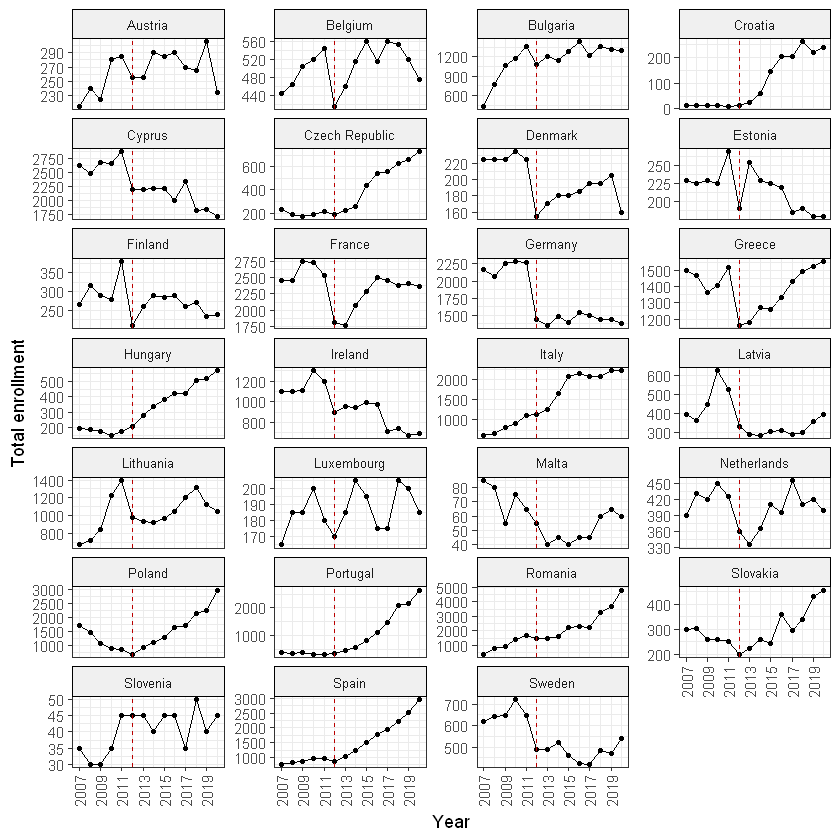

In [21]:
eu_pct <- read.csv("eu_pct_year.csv")

ggplot(eu_pct, aes(x=year, y=total_round)) +
  facet_wrap(vars(eu_country), ncol = 4, scales = "free_y") +
  geom_line() + 
  geom_point(size=1) +
  geom_vline(aes(xintercept=2012), colour = "#BB0000", linetype="dashed") +
  theme_bw () +
  ylab ("Total enrollment") + xlab ("Year") +
  theme(strip.text.x = element_text(size=8),
        strip.background = element_rect(colour="black", fill="#f0f0f0")) +
  scale_colour_brewer(palette = "Set1") + 
  scale_x_continuous(breaks=seq(2007, 2020, 2))  +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5)) + 
  theme(legend.title=element_blank())


In [31]:
eu_pct_below <- eu_pct %>% 
  filter(year >= 2012) %>% 
  filter(eu_country == "Cyprus" | eu_country == "Denmark" | eu_country == "Finland" | 
           eu_country == "France" | eu_country == "Germany" | eu_country == "Ireland" |
           eu_country == "Latvia" | eu_country == "Malta" | eu_country == "Sweden")

ERROR: Error in eu_pct %>% filter(year >= 2012) %>% filter(eu_country == "Cyprus" | : could not find function "%>%"


In [28]:
ggplot(eu_pct_below, aes(x=year, y=pct_per)) +
  facet_wrap(vars(eu_country), ncol = 3, scales = "free_y") +
  geom_line() + 
  geom_point(size=1) +
  geom_vline(aes(xintercept=2012), colour = "#BB0000", linetype="dashed") +
  geom_hline(aes(yintercept=0), colour = "#BB0000") +
  theme_bw () +
  ylab ("Percentage change in enrollment (from mean enrollment before tuition fees)") + xlab ("Year") +
  theme(strip.text.x = element_text(size=8),
        strip.background = element_rect(colour="black", fill="#f0f0f0")) +
  scale_colour_brewer(palette = "Set1") + 
  scale_x_continuous(breaks=seq(2007, 2020, 2))  +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5)) + 
  theme(legend.title=element_blank())

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: conda install
          ^
